# Numeric and Visual Summary of Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = r'D:\PDFs\Edvancer Eduventures\Certified Machine Learning Expert\Data\bank-full.csv'
bd = pd.read_csv(file, delimiter = ";")

# Numeric Summary of Data

In [3]:
bd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Numeric Data

In [4]:
bd.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [5]:
bd['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [6]:
bd['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [7]:
bd['age'].mean()

40.93621021432837

In [8]:
bd['age'].median()

39.0

# Categorical Data

In [9]:
bd['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [10]:
k = bd['job'].value_counts()

In [11]:
k.values

array([9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240,  938,
        288], dtype=int64)

In [12]:
k.index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job')

In [13]:
k.index[-1]

'unknown'

In [14]:
k.index[-2]

'student'

In [15]:
k.index[k.values > 1500]

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed'],
      dtype='object', name='job')

In [16]:
pd.crosstab(bd['default'], bd['housing'])

housing,no,yes
default,,
no,19701,24695
yes,380,435


In [17]:
bd.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [18]:
cat_var = bd.select_dtypes('object').columns
for col in cat_var:
    print(bd[col].value_counts())
    print('----')

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
----
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
----
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----
default
no     44396
yes      815
Name: count, dtype: int64
----
housing
yes    25130
no     20081
Name: count, dtype: int64
----
loan
no     37967
yes     7244
Name: count, dtype: int64
----
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
----
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
----
poutcome
u

In [19]:
bd.groupby(['default'])['age'].median()

default
no     39.0
yes    38.0
Name: age, dtype: float64

In [20]:
numeric_cols = bd.select_dtypes(include='number').columns
median_values = bd.groupby(['default'])[numeric_cols].median()
print(median_values)

          age  balance   day  duration  campaign  pdays  previous
default                                                          
no       39.0    468.0  16.0     180.0       2.0   -1.0       0.0
yes      38.0     -7.0  17.0     172.0       2.0   -1.0       0.0


In [21]:
numeric_cols = bd.select_dtypes(include='number').columns
median_values = bd.groupby(['default', 'loan'])[numeric_cols].median()
print(median_values)

               age  balance   day  duration  campaign  pdays  previous
default loan                                                          
no      no    39.0    509.0  16.0     181.0       2.0   -1.0       0.0
        yes   39.0    284.0  17.0     175.0       2.0   -1.0       0.0
yes     no    38.0     -3.5  17.0     178.5       2.0   -1.0       0.0
        yes   39.0    -21.0  18.0     163.0       2.0   -1.0       0.0


In [22]:
bd.groupby(['housing', 'default'])[['balance', 'day']].median()

balance   day
housing default               
no      no         531.0  17.0
        yes          0.0  18.0
yes     no         425.0  15.0
        yes       -137.0  15.0

# Visual Summary of Data

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
file = r'D:\PDFs\Edvancer Eduventures\Certified Machine Learning Expert\Data\data\bank-full.csv'
bd = pd.read_csv(file, delimiter = ";")

# 1. Visualizing single numeric variable

Density Plots

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\2345776317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'])


<Axes: xlabel='age', ylabel='Density'>

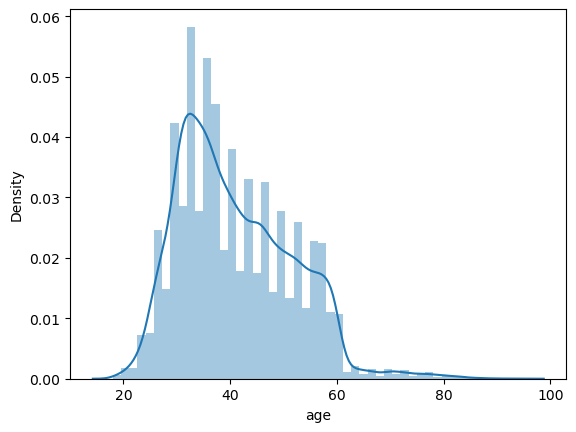

In [25]:
sns.distplot(bd['age'])

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\3362902747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'], kde = False)


<Axes: xlabel='age'>

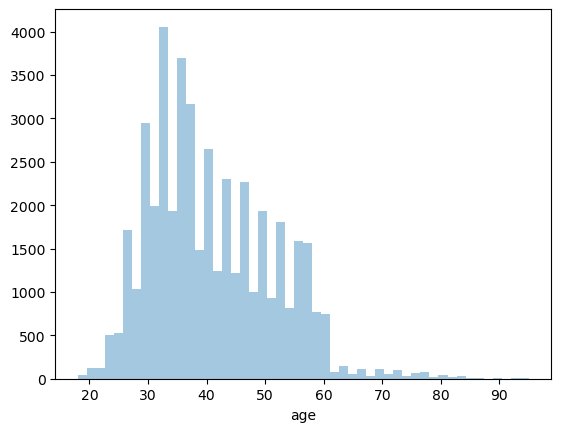

In [26]:
sns.distplot(bd['age'], kde = False)

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\4240823736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'], kde = False, bins = 100)


<Axes: xlabel='age'>

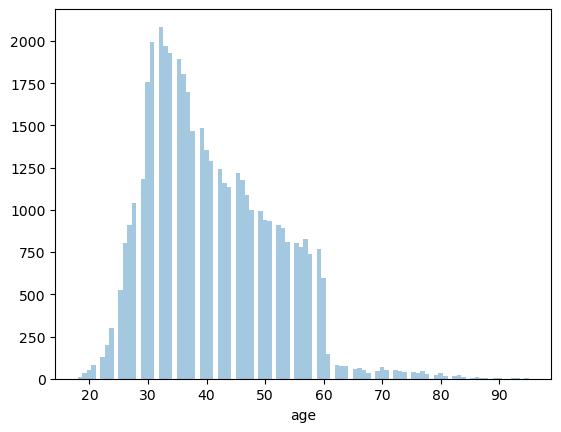

In [27]:
sns.distplot(bd['age'], kde = False, bins = 100)

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\1529794684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'], kde = False, bins = 15)


<Axes: xlabel='age'>

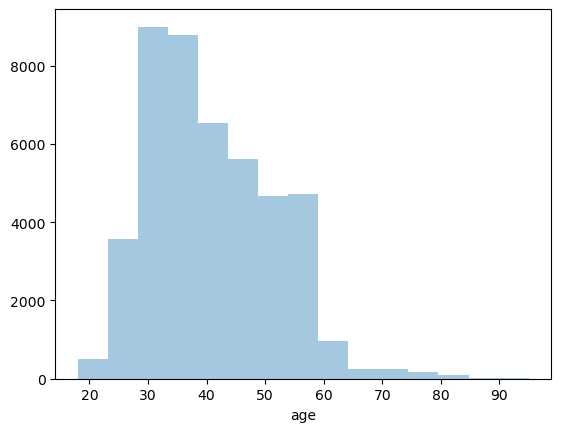

In [28]:
sns.distplot(bd['age'], kde = False, bins = 15)

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\759116359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'], kde = False, bins = 30)


<Axes: xlabel='age'>

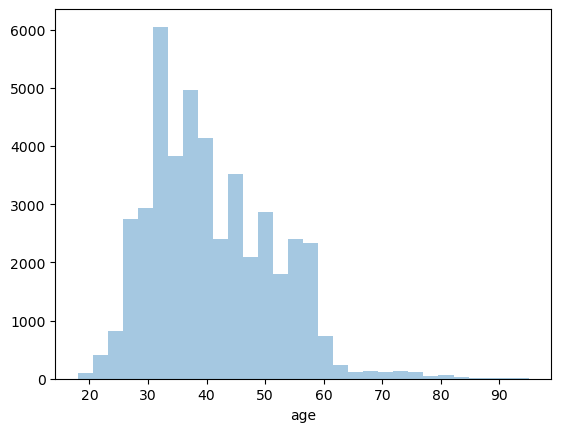

In [29]:
sns.distplot(bd['age'], kde = False, bins = 30)

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\3631091849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bd['age'], kde = False, bins = 30, norm_hist = True)


<Axes: xlabel='age'>

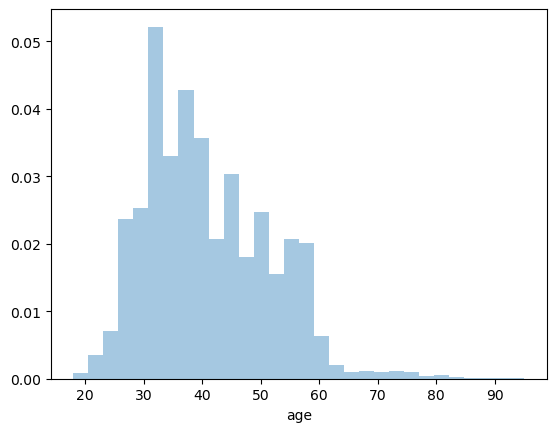

In [30]:
sns.distplot(bd['age'], kde = False, bins = 30, norm_hist = True)

C:\Users\Siddhant Srivastava\AppData\Local\Temp\ipykernel_22176\766724083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  myplot = sns.distplot(bd['age'], kde = False, bins = 30, norm_hist = True)


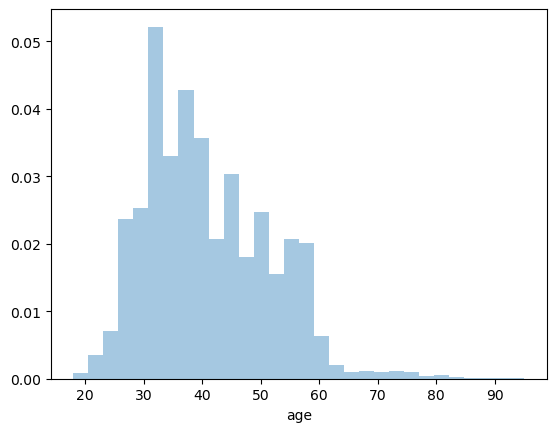

In [31]:
myplot = sns.distplot(bd['age'], kde = False, bins = 30, norm_hist = True)

In [32]:
myimage = myplot.get_figure()

In [33]:
myimage.savefig("output.png")

In [34]:
pwd()

'C:\\Users\\Siddhant Srivastava\\Machine Learning Practise Codes'

<Axes: xlabel='age', ylabel='Density'>

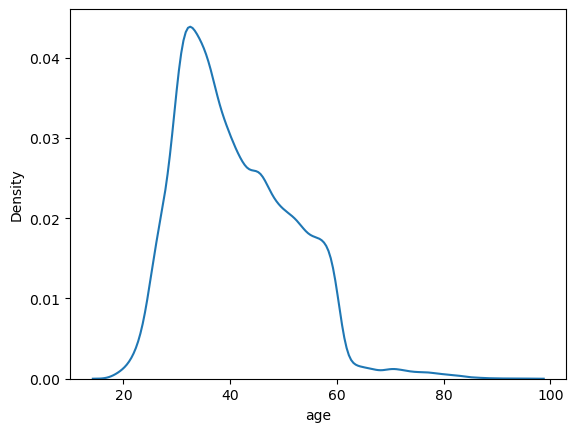

In [35]:
sns.kdeplot(bd['age'])

<Axes: >

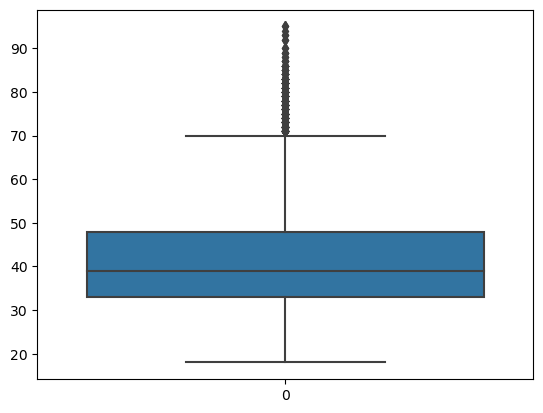

In [36]:
sns.boxplot(bd['age'])

<Axes: ylabel='age'>

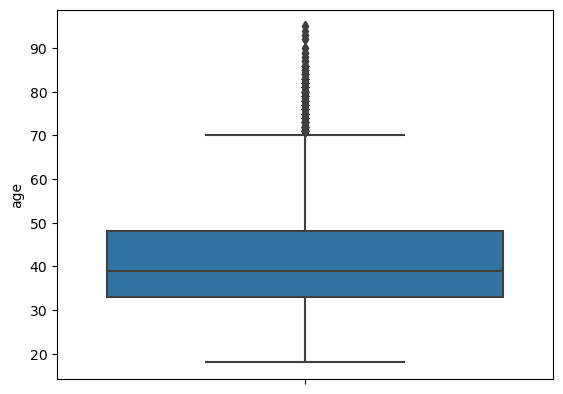

In [37]:
sns.boxplot(y = 'age', data = bd)

<Axes: xlabel='age'>

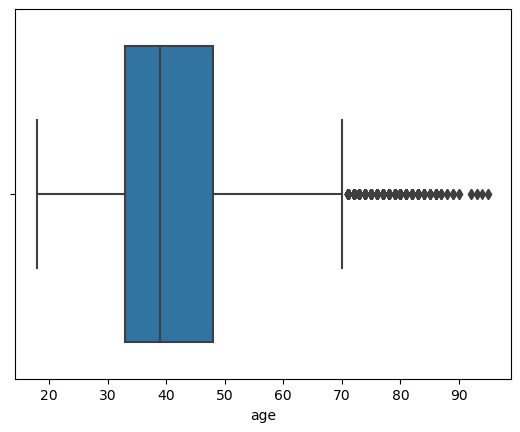

In [38]:
sns.boxplot(x = 'age', data = bd)

Visualizing numeric - numeric variables

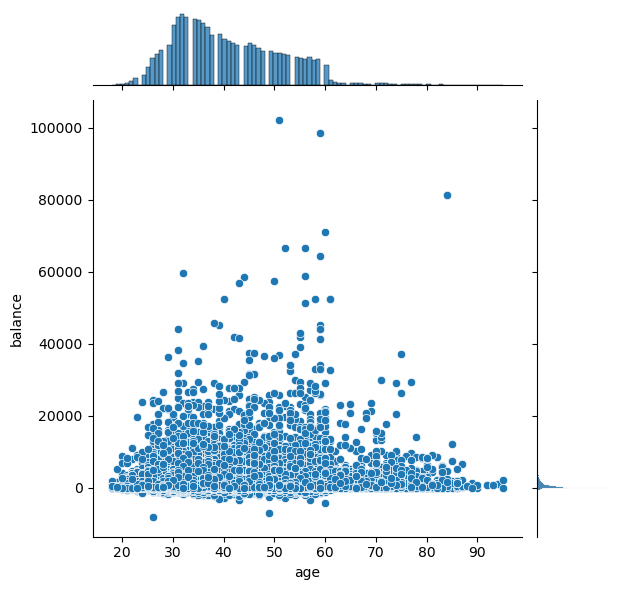

In [39]:
sns.jointplot(x = 'age', y = 'balance', data = bd)

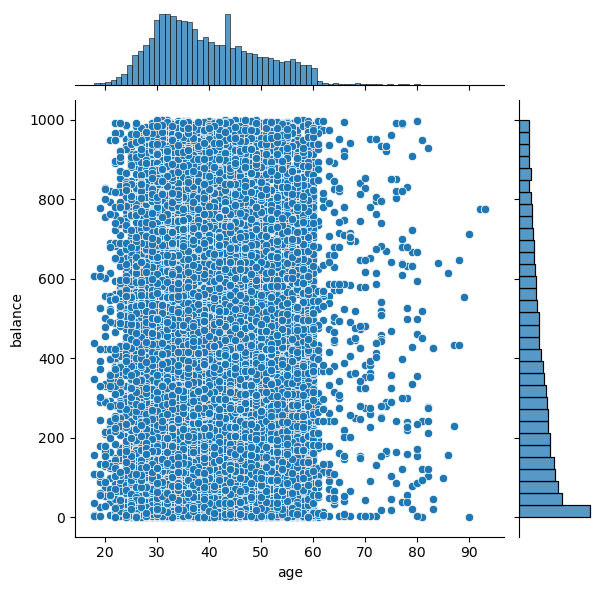

In [40]:
sns.jointplot(x = 'age', y = 'balance', data = bd.loc[((bd['balance'] > 0) & (bd['balance'] < 1000)), :])

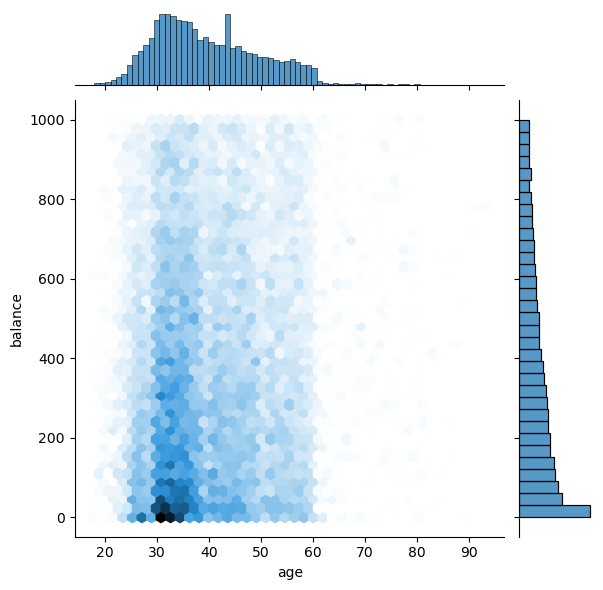

In [41]:
sns.jointplot(x = 'age', y = 'balance', data = bd.loc[((bd['balance'] > 0) & (bd['balance'] < 1000)), :], kind = 'hex')

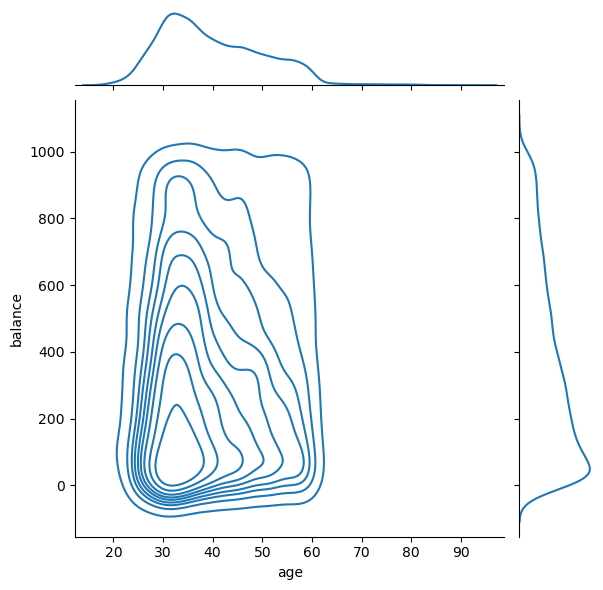

In [42]:
sns.jointplot(x = 'age', y = 'balance', data = bd.loc[((bd['balance'] > 0) & (bd['balance'] < 1000)),:], kind = 'kde')

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


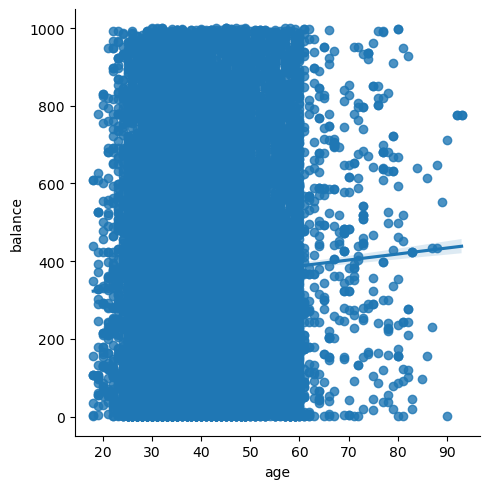

In [43]:
sns.lmplot(x = 'age', y = 'balance', data =bd.loc[((bd['balance'] > 0) & (bd['balance'] < 1000)), :])

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


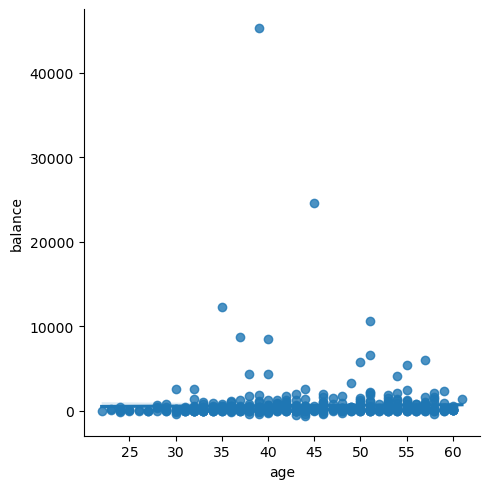

In [44]:
sns.lmplot(x = 'age', y = 'balance', data = bd.iloc[:500, :])

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


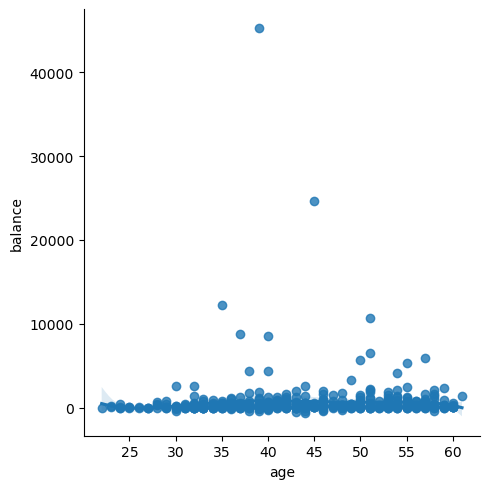

In [45]:
sns.lmplot(x = 'age', y = 'balance', data = bd.iloc[:500, :], order = 6)

# 2. Faceting the data

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


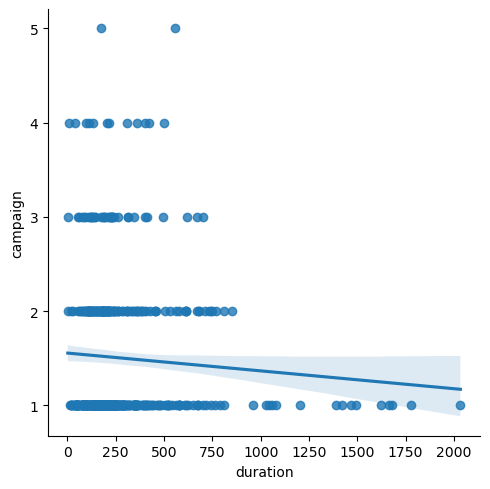

In [46]:
sns.lmplot(x = 'duration', y = 'campaign', data = bd.iloc[:500, :])

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


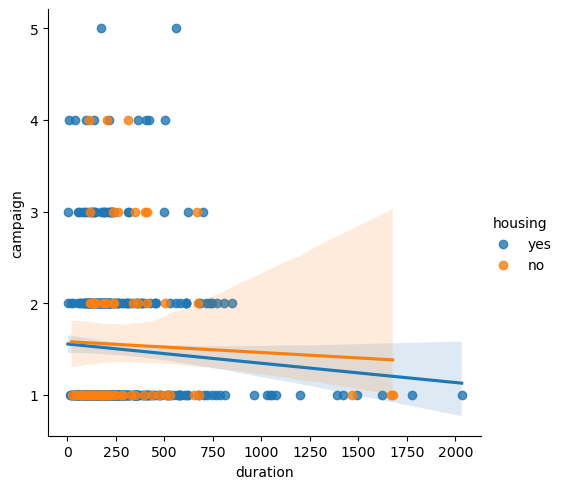

In [47]:
sns.lmplot(x = 'duration', y = 'campaign', data = bd.iloc[:500, :], hue = 'housing')

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


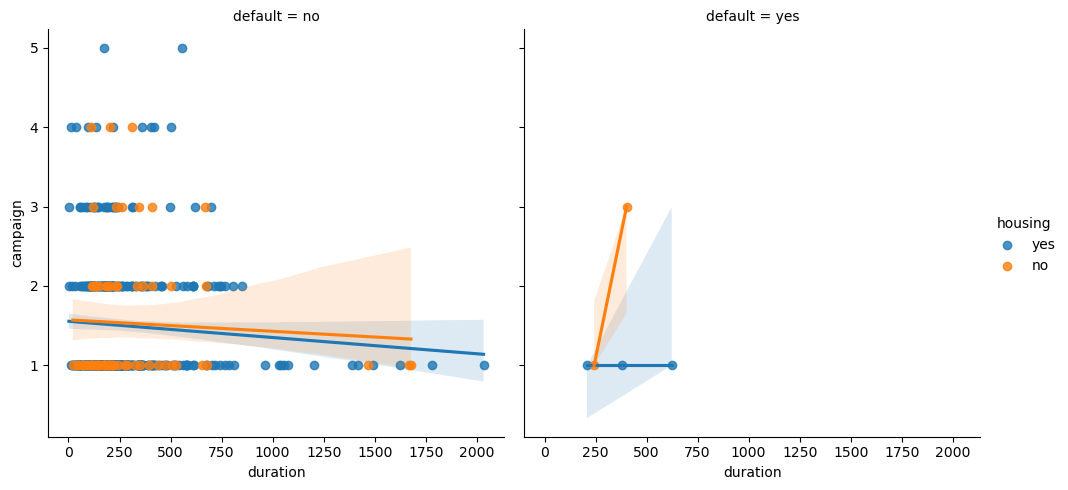

In [48]:
sns.lmplot(x = 'duration', y = 'campaign', data = bd.iloc[:500, :], hue = 'housing', col = 'default')

C:\Users\Siddhant Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


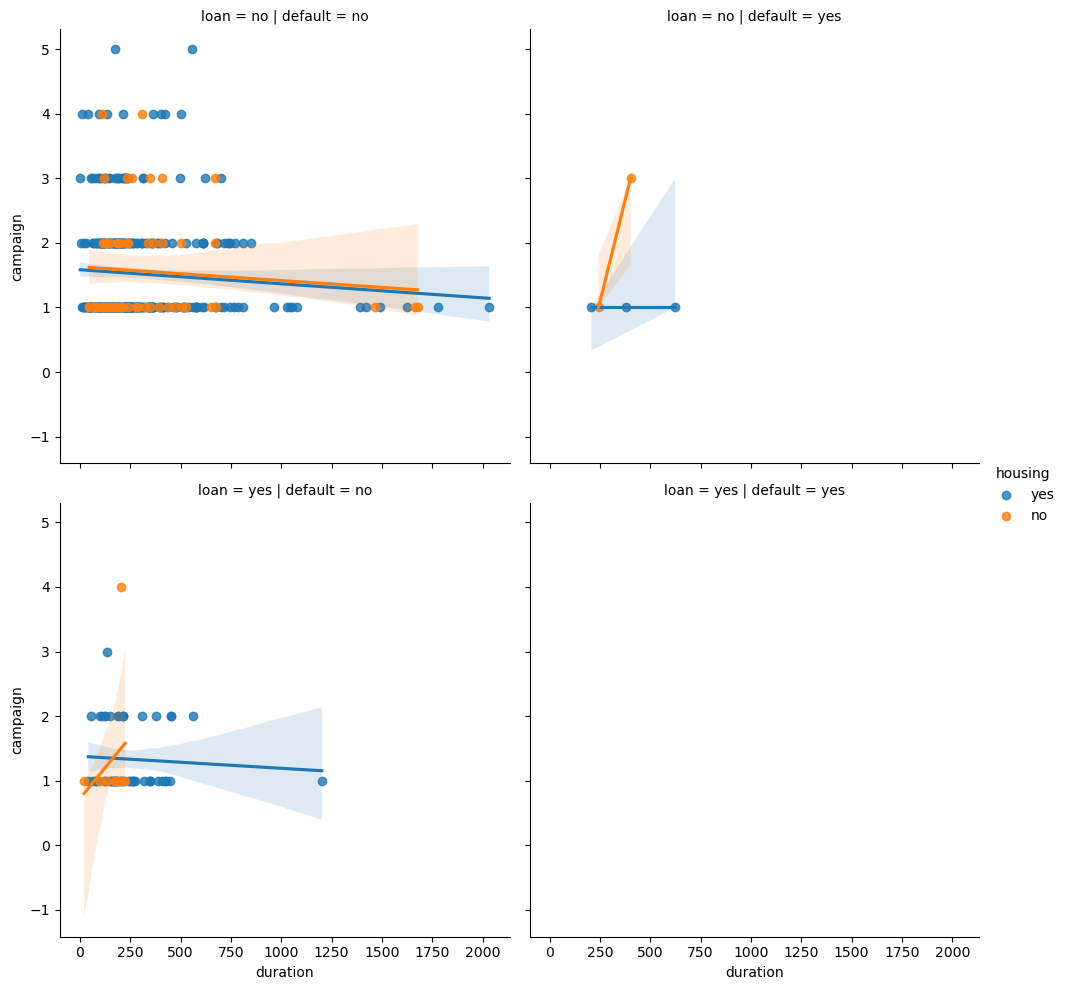

In [49]:
sns.lmplot(x = 'duration', y = 'campaign', data = bd.iloc[:500, :], hue = 'housing', col = 'default', row = 'loan')

# 3. Visualizing categorical data

<Axes: xlabel='education', ylabel='count'>

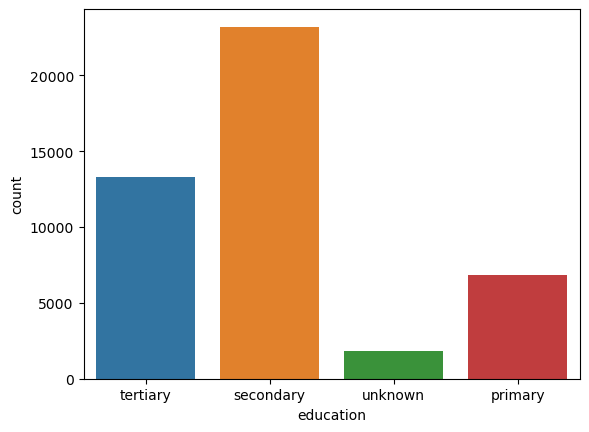

In [50]:
sns.countplot(x = 'education', data = bd)

<Axes: xlabel='education', ylabel='count'>

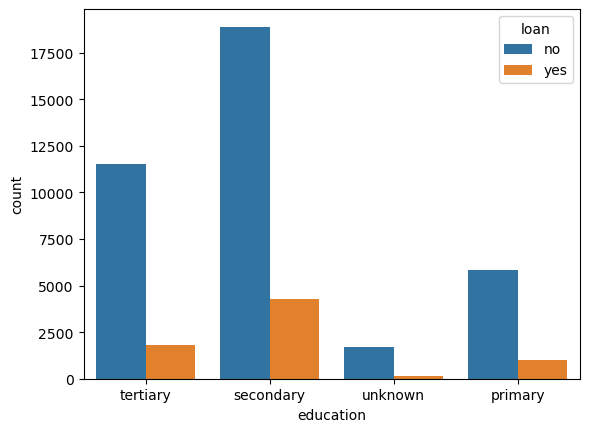

In [51]:
sns.countplot(x = 'education', data = bd, hue = 'loan')

# 4. Faceting of categorical variables

<Axes: xlabel='age', ylabel='education'>

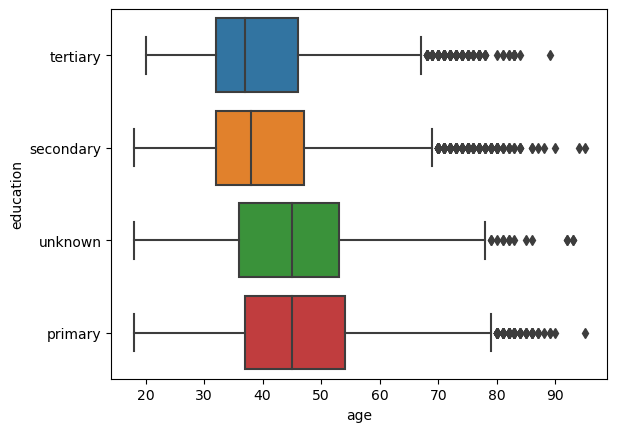

In [52]:
sns.boxplot(x = 'age', y = 'education', data = bd)

# 5. Heatmaps

In [53]:
x = np.random.random(size = (20, 20))

In [54]:
x[:3]

array([[0.52655927, 0.30788937, 0.82438257, 0.54130123, 0.81393048,
        0.63352396, 0.98190684, 0.09361038, 0.77110159, 0.91139211,
        0.97574342, 0.17716633, 0.05808962, 0.62229283, 0.46523671,
        0.90083322, 0.54470473, 0.80192773, 0.34126769, 0.83080208],
       [0.48515329, 0.37812987, 0.62717317, 0.5271875 , 0.5852501 ,
        0.24051399, 0.07653323, 0.86321011, 0.6108236 , 0.73504122,
        0.98412143, 0.39671877, 0.91926704, 0.08099054, 0.27815162,
        0.24448572, 0.33769254, 0.67736804, 0.31594312, 0.37498886],
       [0.97829253, 0.46537839, 0.58267307, 0.52501236, 0.07347633,
        0.08515013, 0.11712493, 0.03503765, 0.2845248 , 0.04896285,
        0.2880497 , 0.85801923, 0.02743017, 0.17082331, 0.93412463,
        0.47728578, 0.72668708, 0.57494202, 0.65871593, 0.14668557]])

<Axes: >

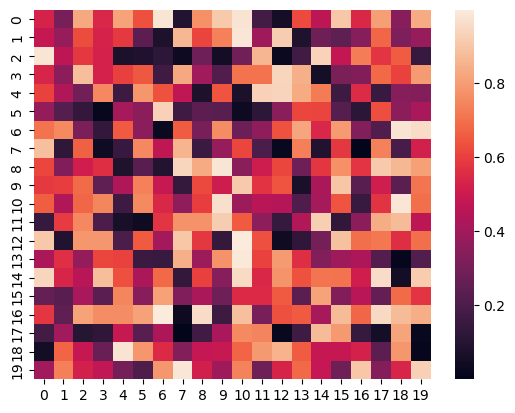

In [55]:
sns.heatmap(x)

In [56]:
numeric_df = bd.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<Axes: >

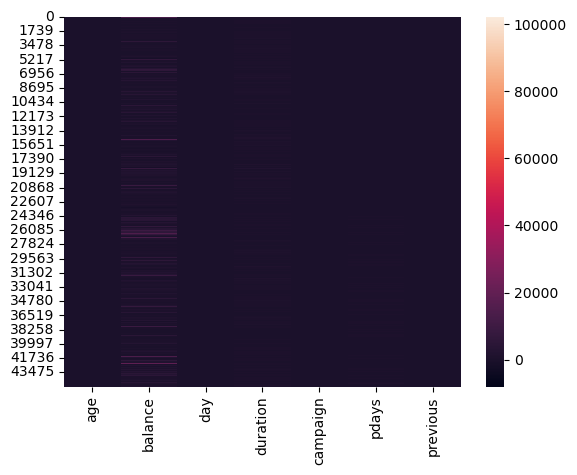

In [57]:
sns.heatmap(numeric_df)